# Data Copilot using Vanna AI

# Package installations

In [12]:
! pip install vanna

# Necessary Imports

In [13]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# Making Database Connections

In [14]:
load_dotenv()

True

In [15]:
import psycopg2

dbname = os.environ['DATABASE_NAME']
user = os.environ['USER_NAME']
password = os.environ['PASSWORD']
host = os.environ['HOSTNAME']
port = os.environ['PORT']

try:
    connection = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)
    print("Connected to database.")
except psycopg2.Error as e:
    print("Error connecting to database:", e)

Connected to database.


# Reading the data from tables

In [16]:
tables = pd.read_sql(
"""
SELECT *
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' 
AND TABLE_SCHEMA = 'public'

""", connection)

tables

/var/folders/l9/9hv3krfn1nlf62cjj00_kzj00000gn/T/ipykernel_1999/817212331.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql(


,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,data-copilot,public,colleague_data,BASE TABLE,None,None,None,None,None,YES,NO,None
1,data-copilot,public,asset_data,BASE TABLE,None,None,None,None,None,YES,NO,None
2,data-copilot,public,office_login_data,BASE TABLE,None,None,None,None,None,YES,NO,None


In [17]:
colleague_data = pd.read_sql_query("SELECT * FROM colleague_data", connection)    
colleague_data

/var/folders/l9/9hv3krfn1nlf62cjj00_kzj00000gn/T/ipykernel_1999/3032449836.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  colleague_data = pd.read_sql_query("SELECT * FROM colleague_data", connection)


,employee_id,emp_name,work_location,work_country,business_unit,department,designation,band,role,date_of_joining,year_of_joining,joining_month
0,1001,John Doe,Building 3,France,BU5,Procurements,Senior Manager,A55,Business Analyst,2020-07-04,2020,July
1,1002,Jane Doe,Building 8,France,BU3,Sales,Lead Developer,A35,UI Developer,2015-10-21,2015,October
2,1003,John Smith,Building 5,Germany,BU2,Finance,Vice President,A55,UI Developer,2015-08-15,2015,August
3,1004,Jane Smith,Building 6,Kenya,BU1,Customer Support,Manager,A50,Project Manager,2023-06-01,2023,June
4,1005,John Johnson,Building 1,Nigeria,BU1,Operations,Director,A30,Python Developer,2018-06-19,2018,June
...,...,...,...,...,...,...,...,...,...,...,...,...
215,1216,Jane Hamilton,Building 9,Canada,BU3,Marketing,Senior Developer,A30,Data Scientist,2018-05-28,2018,May
216,1217,John Graham,Building 8,Brazil,BU6,IT,Vice President,A35,Data Scientist,2021-05-16,2021,May
217,1218,Jane Graham,Building 3,Kenya,BU1,HR,Manager,A50,Data Engineer,2023-12-22,2023,December
218,1219,John Kim,Building 1,USA,BU3,Sales,Senior Developer,A50,Project Manager,2015-06-30,2015,June


In [18]:
asset_data = pd.read_sql_query("SELECT * FROM asset_data", connection)    
asset_data

/var/folders/l9/9hv3krfn1nlf62cjj00_kzj00000gn/T/ipykernel_1999/918127907.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  asset_data = pd.read_sql_query("SELECT * FROM asset_data", connection)


,employee_id,laptop_model,manufacturer
0,1001,Lenovo ThinkPad X1 Yoga,Lenovo
1,1002,HP OmenLenovo ThinkPad X1 Carbon,HP
2,1003,MacBook Air M2,Apple
3,1004,Dell XPS 15,DELL
4,1005,MacBook Pro M3,Apple
...,...,...,...
215,1216,MacBook Pro M3,Apple
216,1217,Lenovo ThinkPad X1 Yoga,Lenovo
217,1218,MacBook Air M2,Apple
218,1219,Lenovo Legion Y740,Lenovo


In [19]:
office_login_data = pd.read_sql_query("SELECT * FROM office_login_data", connection)    
office_login_data

/var/folders/l9/9hv3krfn1nlf62cjj00_kzj00000gn/T/ipykernel_1999/4236006795.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  office_login_data = pd.read_sql_query("SELECT * FROM office_login_data", connection)


,employee_id,date,checkin_time,checkout_time,working_time,work_hours
0,1001,17-09-2020,08:33 AM,04:34 PM,8 hours 01 minutes,8
1,1002,08-08-2015,08:35 AM,02:29 PM,5 hours 54 minutes,6
2,1003,15-07-2015,09:29 AM,03:26 PM,5 hours 57 minutes,6
3,1004,06-12-2023,09:33 AM,03:26 PM,5 hours 53 minutes,6
4,1005,08-10-2018,09:25 AM,03:25 PM,6 hours 00 minutes,6
...,...,...,...,...,...,...
215,1216,11-11-2018,08:30 AM,03:31 PM,7 hours 01 minutes,7
216,1217,02-04-2021,08:25 AM,02:25 PM,6 hours 00 minutes,6
217,1218,02-07-2023,08:34 AM,03:33 PM,6 hours 59 minutes,7
218,1219,24-07-2015,10:30 AM,03:34 PM,5 hours 04 minutes,5


# Using Vanna - Model Training

In [20]:
import vanna as vn
from vanna.remote import VannaDefault


In [21]:
%pip install 'vanna[postgres]'

Note: you may need to restart the kernel to use updated packages.


In [22]:
vanna_api_key = os.environ['VANNA_API_KEY']
vanna_model_name = os.environ['VANNA_MODEL_NAME']

vn = VannaDefault(model=vanna_model_name, api_key=vanna_api_key)

In [23]:
vn.connect_to_postgres(
    host=host,
    dbname=dbname,
    user=user,
    password=password,
    port=port
)

In [24]:
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan

Train on Information Schema: data-copilot.pg_catalog pg_proc
Train on Information Schema: data-copilot.pg_catalog pg_index
Train on Information Schema: data-copilot.pg_catalog pg_operator
Train on Information Schema: data-copilot.pg_catalog pg_opfamily
Train on Information Schema: data-copilot.pg_catalog pg_opclass
Train on Information Schema: data-copilot.pg_catalog pg_am
Train on Information Schema: data-copilot.pg_catalog pg_amop
Train on Information Schema: data-copilot.pg_catalog pg_amproc
Train on Information Schema: data-copilot.pg_catalog pg_language
Train on Information Schema: data-copilot.pg_catalog pg_largeobject_metadata
Train on Information Schema: data-copilot.pg_catalog pg_largeobject
Train on Information Schema: data-copilot.pg_catalog pg_aggregate
Train on Information Schema: data-copilot.pg_catalog pg_statistic
Train on Information Schema: data-copilot.pg_catalog pg_statistic_ext
Train on Information Schema: data-copilot.pg_catalog pg_statistic_ext_data
Train on Info

## Training on the Database Schema

In [25]:
asset_data

,employee_id,laptop_model,manufacturer
0,1001,Lenovo ThinkPad X1 Yoga,Lenovo
1,1002,HP OmenLenovo ThinkPad X1 Carbon,HP
2,1003,MacBook Air M2,Apple
3,1004,Dell XPS 15,DELL
4,1005,MacBook Pro M3,Apple
...,...,...,...
215,1216,MacBook Pro M3,Apple
216,1217,Lenovo ThinkPad X1 Yoga,Lenovo
217,1218,MacBook Air M2,Apple
218,1219,Lenovo Legion Y740,Lenovo


In [90]:
vn.train(plan=plan)

In [91]:
# # DDL statements 
# vn.train(ddl="""
#     CREATE TABLE IF NOT EXISTS artist (
#         artist_id INT PRIMARY KEY,
#         name VARCHAR(100),
#     )
# """)

## Training on Documents

In [92]:
vn.train(documentation=
"""
This database includes several tables like colleague_data and asset_data on colleague/employee information. The colleague_data is the
colleague information and asset_data is the information about the asset the colleague is using. The colleagues use different manufacturer's laptop like 
Apple, DELL, Lenovo, HP and different laptop models like 'MacBook Air M1', 'MacBook Air M2', 'MacBook Pro M1', 'MacBook Pro M2', 'MacBook Pro M3',
                'Dell XPS 15', 'Dell Inspiron 15 5000 Series', 'Dell Latitude 7000 Series', 'Dell Alienware m15', 'Dell Precision 5000 Series'
                "HP Spectre x360", "HP Pavilion", "HP Envy", "HP Elite Dragonfly", "HP Omen"
                "Lenovo ThinkPad X1 Carbon" , "Lenovo ThinkPad X1 Yoga", "Lenovo Legion Y740", "Lenovo IdeaPad Flex 5", "Lenovo Yoga C940"
"""
)

Adding documentation....


'230898-doc'

## Training using custom SQL's

In [93]:
vn.train(
    question="How many colleagues are there in India ?",
    sql="""SELECT * 
    FROM colleague_data
    WHERE work_country = 'India';"""
    )

'f9ca6e5ff05c90aff79e89bf823671b1-sql'

In [94]:
vn.train(
    question="How many colleagues are there in India using macbook pro ?",
    sql="""SELECT COUNT(*) AS total_colleagues
FROM colleague_data cd
JOIN asset_data ad ON cd.employee_id = ad.employee_id
WHERE cd.work_country = 'India' AND ad.laptop_model LIKE '%MacBook Pro%';"""
    )

'9ff8d5b929c454b373c9af40f1895cec-sql'

In [95]:
question = """show me the colleagues who joined in India in year 2015 and and are using MacBook Pro"""

query = """SELECT * FROM 
colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE cd.work_country = 'India' 
AND cd.year_of_joining = 2015
AND ad.laptop_model LIKE '%MacBook Pro%';"""


vn.train(question=question, sql=query)

'8509c41bc8dc3bc58e08e8b19198fe61-sql'

In [96]:
question = """details about the macbook pro users in Technology"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model LIKE '%MacBook Pro%'
AND cd.department = 'Technology'; """

vn.train(question=question, sql=query)

'644073ac448e8060d0e2555d1338dee1-sql'

In [97]:
question = """details about the macbook air users in Technology"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model LIKE '%MacBook Air%'
AND cd.department = 'Technology'; """

vn.train(question=question, sql=query)

'0e8209b6c1de85a7af347b790f18bdd0-sql'

In [98]:
question = """details about the macbook air m1 users in Technology"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model = 'MacBook Air M1'
AND cd.department = 'Technology'; """

vn.train(question=question, sql=query)

'9aa653021ebc8576be8ccf1449922d58-sql'

In [99]:
question = """details about the macbook pro m3 users in Technology"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model = 'MacBook Pro M3'
AND cd.department = 'Technology'; """

vn.train(question=question, sql=query)

'73bb70d490ac513200bfb1c76817c550-sql'

In [100]:
question = """details about the M1 chip MacBook Pro users"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model LIKE 'MacBook Pro M1'"""

vn.train(question=question, sql=query)

'3079f8b099fa633e0e1f4b3bcadd4b2d-sql'

In [101]:
question = """details about the M2 chip MacBook Pro users"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model LIKE 'MacBook Pro M2'"""

vn.train(question=question, sql=query)

'129ebe3fd9340212894e410b55998089-sql'

In [102]:
question = """details about the M3 chip MacBook Pro users"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model LIKE 'MacBook Pro M3'"""

vn.train(question=question, sql=query)

'd43d1128b005d0fae56bd13a68336b53-sql'

In [103]:
question = """details about the M1 chip macbook pro users"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model LIKE 'MacBook Pro M1'"""

vn.train(question=question, sql=query)

'1ea7d353156f1db42bbdd516eec5198b-sql'

In [104]:
question = """details about the M1 chip macbook pro users"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model = 'MacBook Pro M1'"""

vn.train(question=question, sql=query)

'1ea7d353156f1db42bbdd516eec5198b-sql'

In [105]:
question = """details about the M2 chip macbook air users"""

query = """SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model LIKE 'MacBook Air M2'"""

vn.train(question=question, sql=query)

'24e193833337fc57a3c8053f58e23121-sql'

In [106]:
question = """Details of colleagues who are short of working hours"""

query = """SELECT *
FROM colleague_data cd
JOIN office_login_data ol 
ON cd.employee_id = ol.employee_id
WHERE ol.work_hours < 6 """

vn.train(question=question, sql=query)

'35b89a56b19ed5dcbc28de5c80c9f7a4-sql'

In [107]:
question = """details of colleagues who are working less than 6 hours in office"""

query = """SELECT *
FROM colleague_data cd
JOIN office_login_data ol 
ON cd.employee_id = ol.employee_id
WHERE ol.work_hours < 6 """

vn.train(question=question, sql=query)

'19ac269af6dc707cc6cad0a0f7f56652-sql'

In [108]:
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,230862-doc,documentation,None,The following columns are in the information_schema_catalog_name table in the data-copilot database:\n\n| | table_catalog | table_schema | table_name | column_name | data_type |\n|-----:|:----------------|:-------------------|:--------------------------------|:--------------|:------------|\n| 1523 | data-copilot | information_schema | information_schema_catalog_name | catalog_name | name |
1,230764-doc,documentation,None,The following columns are in the pg_timezone_names table in the data-copilot database:\n\n| | table_catalog | table_schema | table_name | column_name | data_type |\n|-----:|:----------------|:---------------|:------------------|:--------------|:------------|\n| 447 | data-copilot | pg_catalog | pg_timezone_names | utc_offset | interval |\n| 448 | data-copilot | pg_catalog | pg_timezone_names | is_dst | boolean |\n| 1208 | data-copilot |...
2,230747-doc,documentation,None,The following columns are in the pg_tables table in the data-copilot database:\n\n| | table_catalog | table_schema | table_name | column_name | data_type |\n|-----:|:----------------|:---------------|:-------------|:--------------|:------------|\n| 363 | data-copilot | pg_catalog | pg_tables | hasindexes | boolean |\n| 364 | data-copilot | pg_catalog | pg_tables | hasrules | boolean |\n| 365 | data-copilot | pg_catalog | pg_tables ...
3,230774-doc,documentation,None,The following columns are in the pg_statio_sys_tables table in the data-copilot database:\n\n| | table_catalog | table_schema | table_name | column_name | data_type |\n|-----:|:----------------|:---------------|:---------------------|:----------------|:------------|\n| 569 | data-copilot | pg_catalog | pg_statio_sys_tables | relid | oid |\n| 570 | data-copilot | pg_catalog | pg_statio_sys_tables | heap_blks_read | bigint |\n| ...
4,230744-doc,documentation,None,The following columns are in the pg_shadow table in the data-copilot database:\n\n| | table_catalog | table_schema | table_name | column_name | data_type |\n|-----:|:----------------|:---------------|:-------------|:--------------|:-------------------------|\n| 349 | data-copilot | pg_catalog | pg_shadow | usesysid | oid |\n| 350 | data-copilot | pg_catalog | pg_shadow | usecreatedb | boolean |\n| ...
...,...,...,...,...
222,230734-doc,documentation,None,The following columns are in the pg_parameter_acl table in the data-copilot database:\n\n| | table_catalog | table_schema | table_name | column_name | data_type |\n|-----:|:----------------|:---------------|:-----------------|:--------------|:------------|\n| 291 | data-copilot | pg_catalog | pg_parameter_acl | oid | oid |\n| 292 | data-copilot | pg_catalog | pg_parameter_acl | paracl | ARRAY |\n| 1587 | data-copilot | pg_c...
223,197846-sql,sql,details of colleagues who are working less than 6 hours in office,SELECT *\nFROM colleague_data cd\nJOIN office_login_data ol \nON cd.employee_id = ol.employee_id\nWHERE ol.work_hours < 6
224,230853-doc,documentation,None,The following columns are in the role_usage_grants table in the data-copilot database:\n\n| | table_catalog | table_schema | table_name | column_name | data_type |\n|-----:|:----------------|:-------------------|:------------------|:---------------|:------------------|\n| 1372 | data-copilot | information_schema | role_usage_grants | grantor | name |\n| 1373 | data-copilot | information_schema | role_usage_grants | grantee | nam...
225,230768-doc,documentation,None,The following columns are in the pg_stat_xact_all_tables table in the data-copilot database:\n\n| | table_catalog | table_schema | table_name | column_name | data_type |\n|-----:|:----------------|:---------------|:------------------------|:------------------|:------------|\n| 482 | data-copilot | pg_catalog | pg_stat_xact_all_tables | relid | oid |\n| 483 | data-copilot | pg_catalog | pg_stat_xact_all_tables | seq_scan ...


# Interacting with Model

SELECT cd.*
FROM colleague_data cd
JOIN asset_data ad
ON cd.employee_id = ad.employee_id
WHERE cd.work_country = 'India'
AND cd.year_of_joining = 2015
AND ad.laptop_model LIKE 'MacBook Pro%'
Empty DataFrame
Columns: [employee_id, emp_name, work_location, work_country, business_unit, department, designation, band, role, date_of_joining, year_of_joining, joining_month]
Index: []


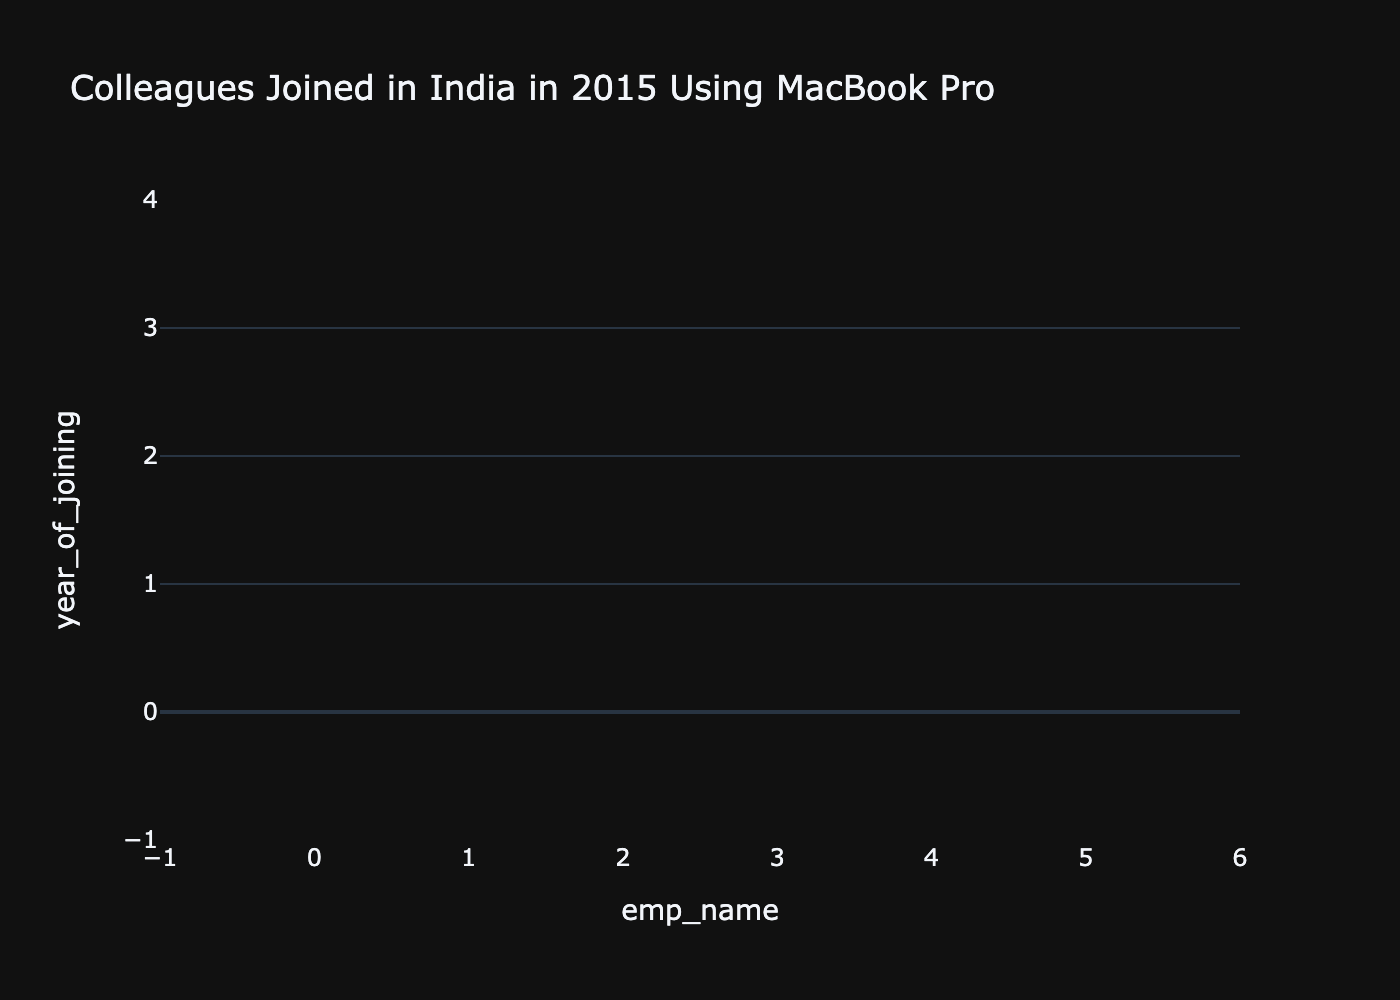

("SELECT cd.*\nFROM colleague_data cd\nJOIN asset_data ad\nON cd.employee_id = ad.employee_id\nWHERE cd.work_country = 'India'\nAND cd.year_of_joining = 2015\nAND ad.laptop_model LIKE 'MacBook Pro%'",
 Empty DataFrame
 Columns: [employee_id, emp_name, work_location, work_country, business_unit, department, designation, band, role, date_of_joining, year_of_joining, joining_month]
 Index: [],
 None)

In [109]:
vn.ask("show me the colleagues who joined in India in year 2015 and and are using macbook pro")

SELECT year_of_joining, COUNT(*) AS total_employees
FROM colleague_data
WHERE year_of_joining >= 2015
GROUP BY year_of_joining
ORDER BY year_of_joining;
   year_of_joining  total_employees
0             2015               20
1             2016               20
2             2017               31
3             2018               20
4             2019               26
5             2020               20
6             2021               28
7             2022               24
8             2023               27
9             2024                4


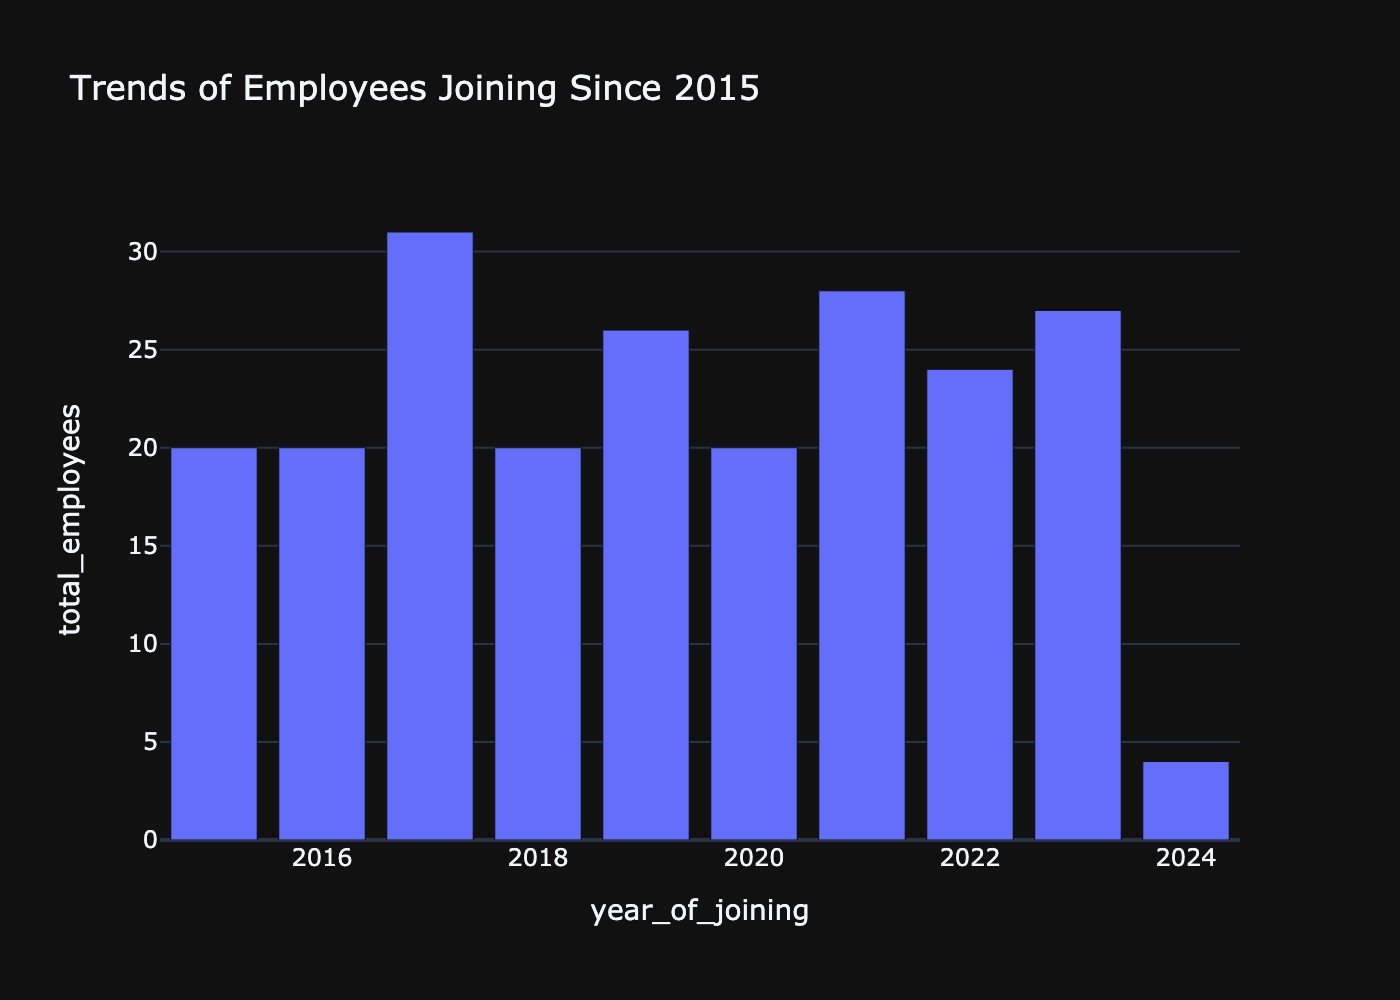

('SELECT year_of_joining, COUNT(*) AS total_employees\nFROM colleague_data\nWHERE year_of_joining >= 2015\nGROUP BY year_of_joining\nORDER BY year_of_joining;',
    year_of_joining  total_employees
 0             2015               20
 1             2016               20
 2             2017               31
 3             2018               20
 4             2019               26
 5             2020               20
 6             2021               28
 7             2022               24
 8             2023               27
 9             2024                4,
 None)

In [110]:
vn.ask('give me the trends of employees joining since 2015')

SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model = 'MacBook Air M1'
AND cd.department = 'Technology'; 
   employee_id       emp_name work_location work_country business_unit  \
0         1083      John Hill   Building 10           UK           BU2   
1         1214  Jane Reynolds    Building 7        India           BU4   

   department designation band             role date_of_joining  \
0  Technology    Director  A35  Project Manager      2023-06-01   
1  Technology     Manager  A35    Data Engineer      2018-12-17   

   year_of_joining joining_month  employee_id    laptop_model manufacturer  
0             2023          June         1083  MacBook Air M1        Apple  
1             2018      December         1214  MacBook Air M1        Apple  


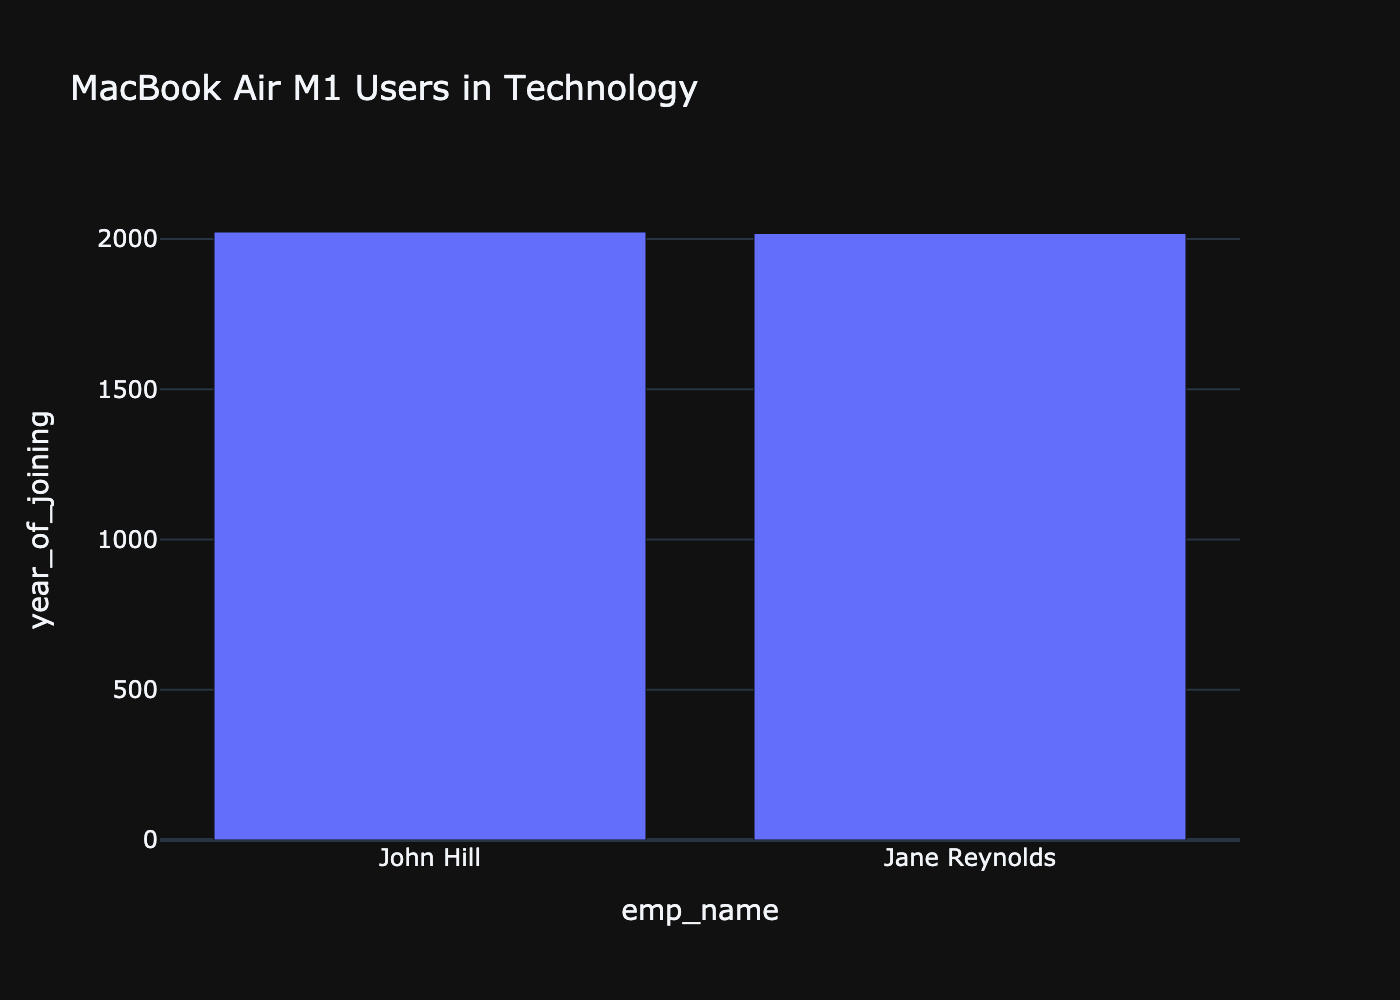

("SELECT *\nFROM colleague_data cd\nJOIN asset_data ad \nON cd.employee_id = ad.employee_id\nWHERE ad.laptop_model = 'MacBook Air M1'\nAND cd.department = 'Technology'; ",
    employee_id       emp_name work_location work_country business_unit  \
 0         1083      John Hill   Building 10           UK           BU2   
 1         1214  Jane Reynolds    Building 7        India           BU4   
 
    department designation band             role date_of_joining  \
 0  Technology    Director  A35  Project Manager      2023-06-01   
 1  Technology     Manager  A35    Data Engineer      2018-12-17   
 
    year_of_joining joining_month  employee_id    laptop_model manufacturer  
 0             2023          June         1083  MacBook Air M1        Apple  
 1             2018      December         1214  MacBook Air M1        Apple  ,
 None)

In [111]:
vn.ask("details about the macbook air m1 users in Technology")

SELECT department, COUNT(*) AS total_colleagues
FROM colleague_data
GROUP BY department
ORDER BY total_colleagues DESC
LIMIT 5;
         department  total_colleagues
0      Procurements                39
1        Technology                30
2           Finance                29
3             Sales                27
4  Customer Support                22


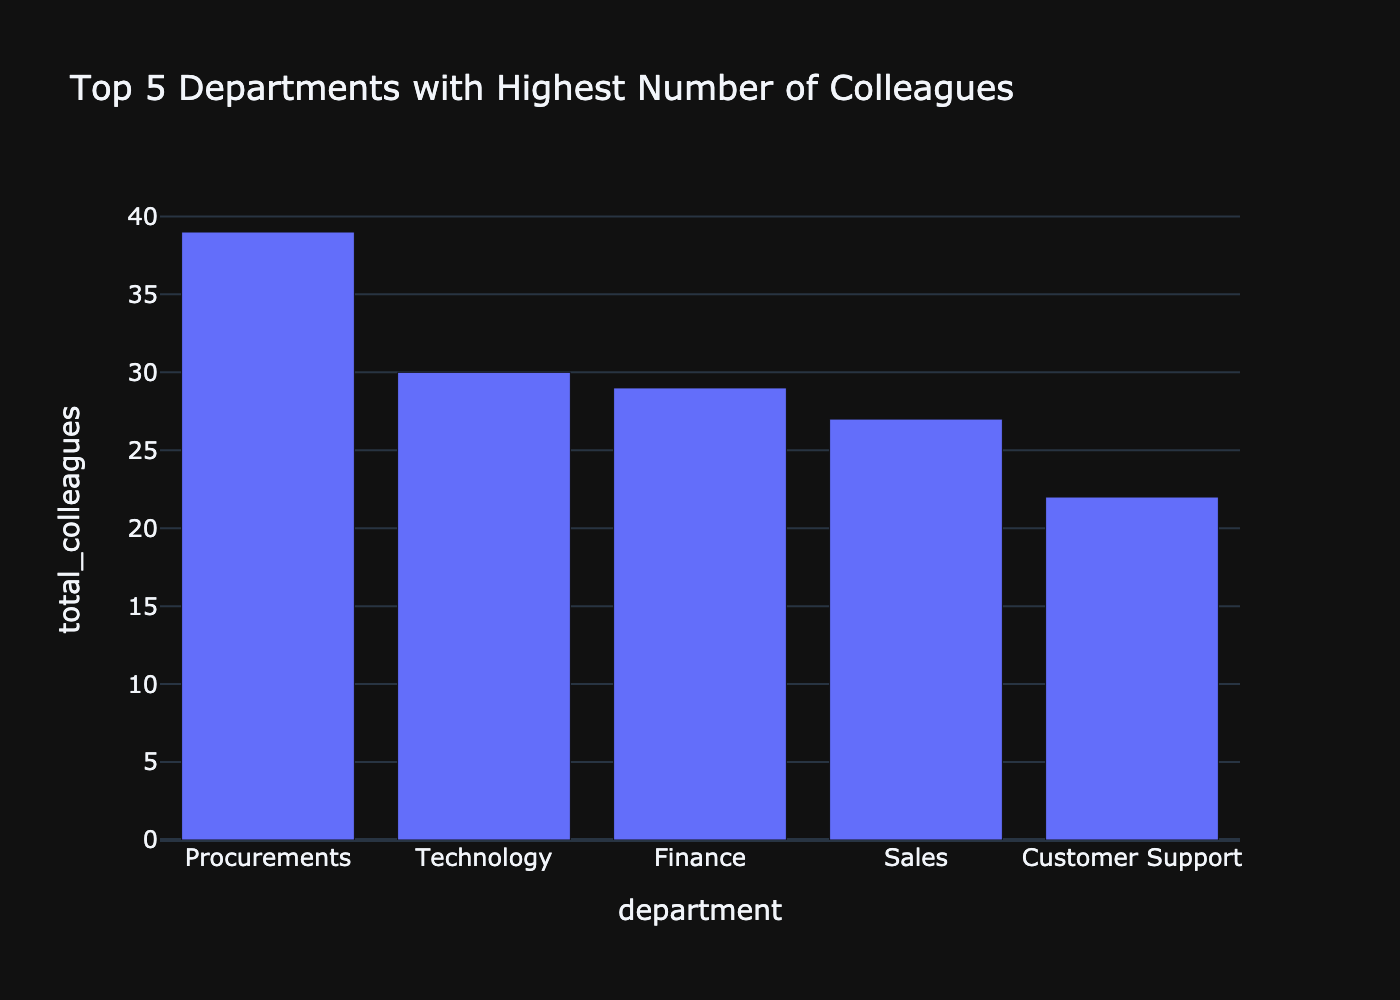

('SELECT department, COUNT(*) AS total_colleagues\nFROM colleague_data\nGROUP BY department\nORDER BY total_colleagues DESC\nLIMIT 5;',
          department  total_colleagues
 0      Procurements                39
 1        Technology                30
 2           Finance                29
 3             Sales                27
 4  Customer Support                22,
 None)

In [112]:
vn.ask('Top 5 departments with highest number of colleagues')

SELECT department, COUNT(*) AS total_colleagues
FROM colleague_data
WHERE year_of_joining <= EXTRACT(YEAR FROM CURRENT_DATE) - 5
GROUP BY department
ORDER BY total_colleagues DESC
LIMIT 5;
         department  total_colleagues
0      Procurements                21
1        Technology                16
2           Finance                14
3             Sales                14
4  Customer Support                11


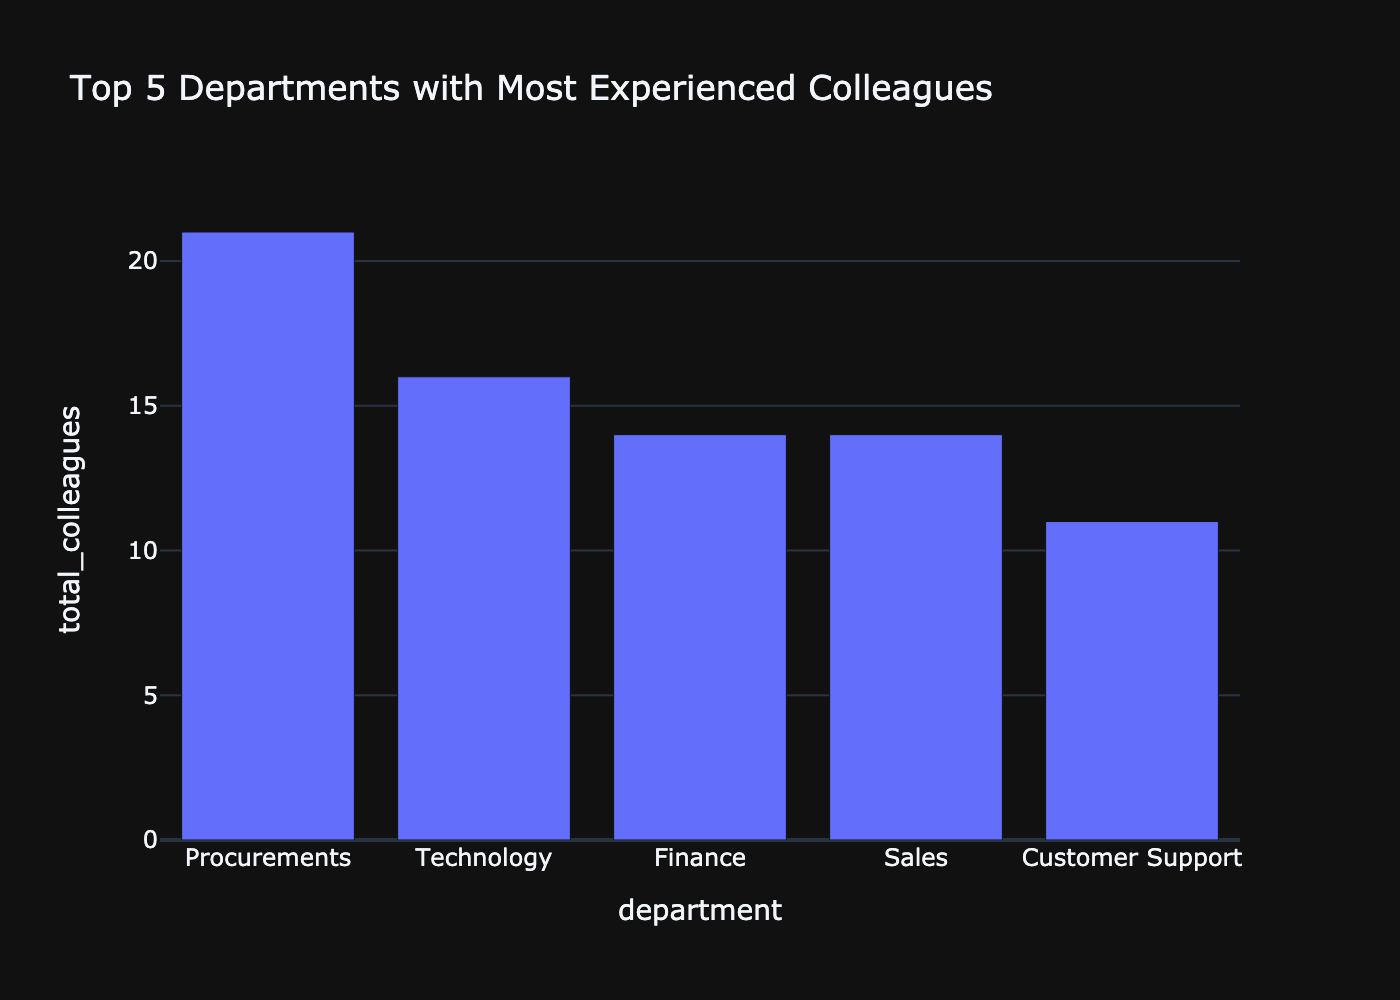

('SELECT department, COUNT(*) AS total_colleagues\nFROM colleague_data\nWHERE year_of_joining <= EXTRACT(YEAR FROM CURRENT_DATE) - 5\nGROUP BY department\nORDER BY total_colleagues DESC\nLIMIT 5;',
          department  total_colleagues
 0      Procurements                21
 1        Technology                16
 2           Finance                14
 3             Sales                14
 4  Customer Support                11,
 None)

In [113]:
vn.ask('Top 5 departments with most experienced colleagues. assume 5 years of experience is considered as experience')

SELECT COUNT(*) AS total_users
FROM asset_data
WHERE laptop_model = 'MacBook Air M2';
   total_users
0           10


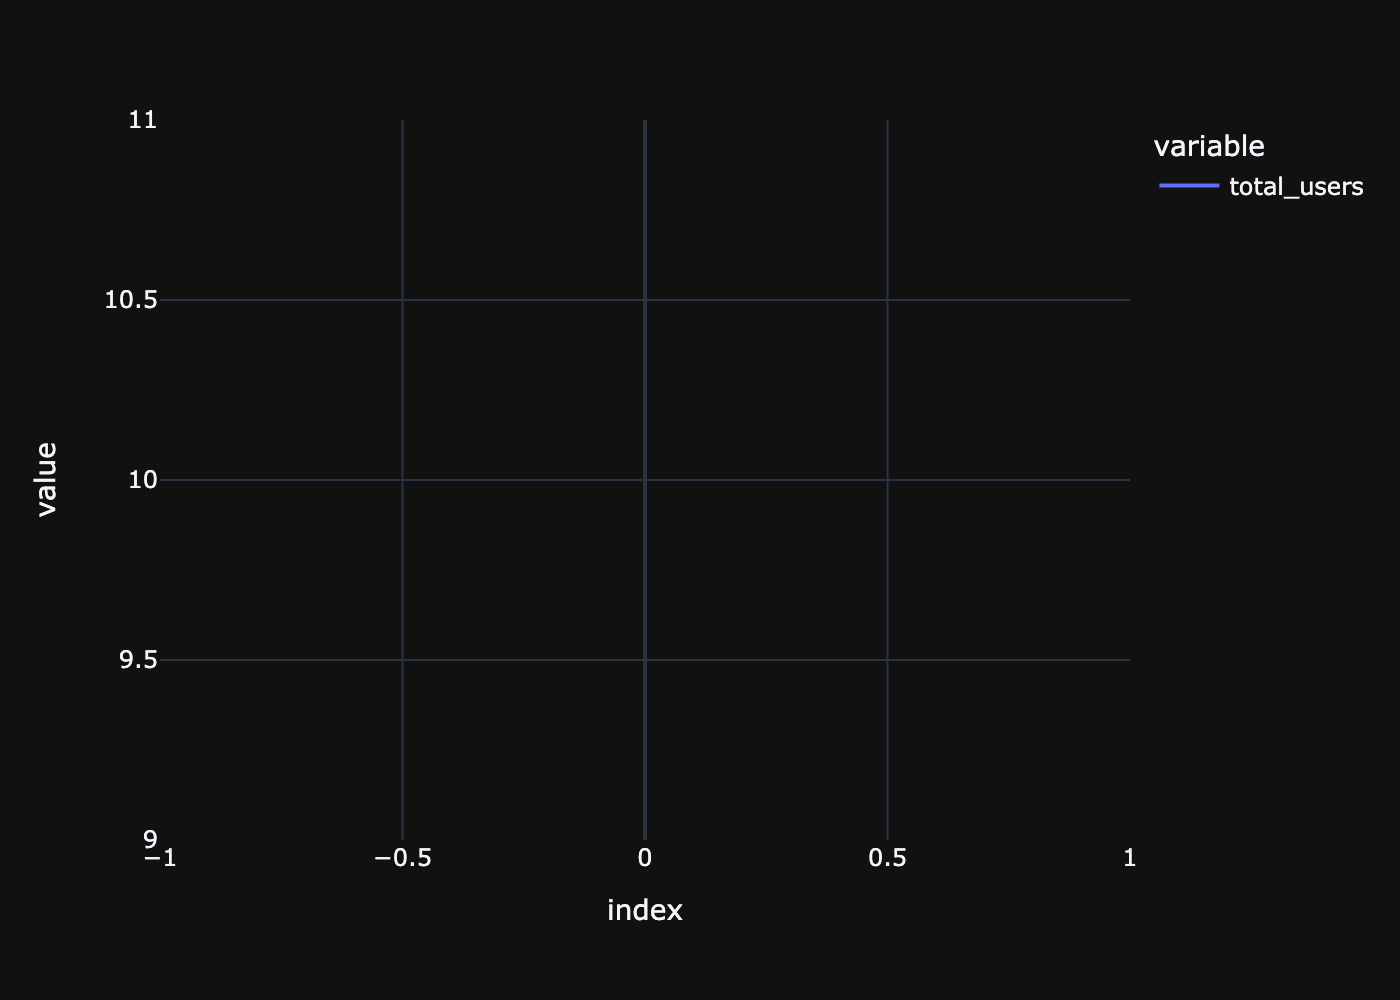

("SELECT COUNT(*) AS total_users\nFROM asset_data\nWHERE laptop_model = 'MacBook Air M2';",
    total_users
 0           10,
 None)

In [114]:
vn.ask('count about the M2 chip macbook air users')

# Flask API

In [115]:
from vanna.flask import VannaFlaskApp

In [123]:
app = VannaFlaskApp(vn, allow_llm_to_see_data=True)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: off


# Seeing the Training Data

In [ ]:
train_df = vn.get_training_data()
train_df

,id,training_data_type,question,content
0,230511-doc,documentation,None,The following columns are in the pg_foreign_ta...
1,230543-doc,documentation,None,The following columns are in the pg_sequences ...
2,230533-doc,documentation,None,The following columns are in the pg_shadow tab...
3,230578-doc,documentation,None,The following columns are in the pg_stat_user_...
4,230623-doc,documentation,None,The following columns are in the column_column...
...,...,...,...,...
222,230487-doc,documentation,None,The following columns are in the pg_trigger ta...
223,230568-doc,documentation,None,The following columns are in the pg_stat_sys_t...
224,230528-doc,documentation,None,The following columns are in the pg_publicatio...
225,230641-doc,documentation,None,The following columns are in the sql_features ...


In [ ]:
train_df['training_data_type'].unique()

array(['documentation', 'sql'], dtype=object)

In [ ]:
train_df[train_df['training_data_type']=='sql']

,id,training_data_type,question,content
12,197677-sql,sql,details about the M2 chip macbook air users,SELECT *\nFROM colleague_data cd\nJOIN asset_d...
19,197671-sql,sql,details about the M1 chip MacBook Pro users,SELECT *\nFROM colleague_data cd\nJOIN asset_d...
36,197627-sql,sql,details about the macbook air m1 users in Tech...,SELECT *\nFROM colleague_data cd\nJOIN asset_d...
48,197624-sql,sql,show me the colleagues who joined in India in ...,SELECT * FROM \ncolleague_data cd\nJOIN asset_...
73,197622-sql,sql,How many colleagues are there in India ?,SELECT * \n FROM colleague_data\n WHERE ...
74,197660-sql,sql,Top 5 departments with most experienced collea...,"SELECT department, COUNT(*) AS total_colleague..."
112,197674-sql,sql,details about the M1 chip macbook pro users,SELECT *\nFROM colleague_data cd\nJOIN asset_d...
122,197625-sql,sql,details about the macbook pro users in Technology,SELECT *\nFROM colleague_data cd\nJOIN asset_d...
127,197673-sql,sql,details about the M3 chip MacBook Pro users,SELECT *\nFROM colleague_data cd\nJOIN asset_d...
136,197626-sql,sql,details about the macbook air users in Technology,SELECT *\nFROM colleague_data cd\nJOIN asset_d...


In [ ]:
# train_df[train_df['training_data_type']=='ddl']

,id,training_data_type,question,content


In [ ]:
import pandas as pd

# Set the maximum column width to 500
pd.set_option('display.max_colwidth', 500)


In [ ]:
print(train_df[train_df['question'] == 'details about the M2 chip macbook air users'])

            id training_data_type  \
12  197677-sql                sql   

                                       question  \
12  details about the M2 chip macbook air users   

                                                                                                                                   content  
12  SELECT *\nFROM colleague_data cd\nJOIN asset_data ad \nON cd.employee_id = ad.employee_id\nWHERE ad.laptop_model LIKE 'MacBook Air M1'  


In [ ]:
vn.remove_training_data(id='197677-sql')

True